In [233]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [234]:
credits_df = pd.read_csv('dataset/credits.csv')
titles_df = pd.read_csv('dataset/titles.csv')

In [235]:
credits_df
unique_count = credits_df['id'].nunique()
print(unique_count)

5489


In [236]:
titles_df
unique_count = titles_df['id'].nunique()
print(unique_count)


5850


In [237]:
combined_df = pd.merge(titles_df, credits_df, left_on = "id", right_on = "id")
combined_df = combined_df.drop('character', axis=1)
combined_df.dropna(subset=['title'], inplace=True)
combined_df

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,role
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179,3748,Robert De Niro,ACTOR
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179,14658,Jodie Foster,ACTOR
2,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179,7064,Albert Brooks,ACTOR
3,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179,3739,Harvey Keitel,ACTOR
4,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179,48933,Cybill Shepherd,ACTOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77796,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],NaN,tt14585902,3.8,68.0,26.005,6.300,736339,Adelaida Buscato,ACTOR
77797,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],NaN,tt14585902,3.8,68.0,26.005,6.300,399499,Luz Stella Luengas,ACTOR
77798,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],NaN,tt14585902,3.8,68.0,26.005,6.300,373198,Inés Prieto,ACTOR
77799,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],NaN,tt14585902,3.8,68.0,26.005,6.300,378132,Isabel Gaona,ACTOR


In [238]:
combined_df.drop(columns=['seasons'], inplace=True)
combined_df

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,role
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],tt0075314,8.2,808582.0,40.965,8.179,3748,Robert De Niro,ACTOR
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],tt0075314,8.2,808582.0,40.965,8.179,14658,Jodie Foster,ACTOR
2,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],tt0075314,8.2,808582.0,40.965,8.179,7064,Albert Brooks,ACTOR
3,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],tt0075314,8.2,808582.0,40.965,8.179,3739,Harvey Keitel,ACTOR
4,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],tt0075314,8.2,808582.0,40.965,8.179,48933,Cybill Shepherd,ACTOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77796,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],tt14585902,3.8,68.0,26.005,6.300,736339,Adelaida Buscato,ACTOR
77797,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],tt14585902,3.8,68.0,26.005,6.300,399499,Luz Stella Luengas,ACTOR
77798,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],tt14585902,3.8,68.0,26.005,6.300,373198,Inés Prieto,ACTOR
77799,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],tt14585902,3.8,68.0,26.005,6.300,378132,Isabel Gaona,ACTOR


In [239]:
actor_counts = combined_df['person_id'].value_counts()
actors_more_than_one_movie = actor_counts[actor_counts > 1].index

filtered_df = combined_df[combined_df['person_id'].isin(actors_more_than_one_movie)]

In [240]:
actor_avg_scores = filtered_df.groupby('name')['imdb_score'].mean().reset_index().dropna()
actor_avg_scores

,name,imdb_score
0,'Weird Al' Yankovic,6.500000
1,50 Cent,6.866667
2,A$AP Rocky,6.650000
3,A. L. Vijay,6.000000
4,A.D. Miles,6.766667
...,...,...
11893,Łukasz Simlat,6.600000
11894,Şafak Sezer,7.133333
11895,Şebnem Bozoklu,5.050000
11896,Şenol Sönmez,5.150000


In [241]:
top100Actors=actor_avg_scores.sort_values(by='imdb_score', ascending=False)
top100Actors=top100Actors.head(10)

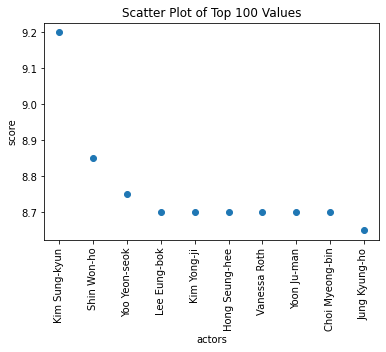

<Figure size 360x1440 with 0 Axes>

In [242]:
x = top100Actors['name']
y = top100Actors['imdb_score']

# Create scatter plot
plt.scatter(x, y)
plt.xlabel('actors')
plt.ylabel('score')
plt.title('Scatter Plot of Top 100 Values')
plt.xticks(rotation=90)
plt.figure(figsize=(5, 20))
plt.show()

In [243]:
# pivot_df = combined_df.pivot_table(index=['id', 'title', 'type', 'description', 'release_year', 'age_certification', 'runtime', 'genres', 'production_countries', 'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score'],
#                           columns='role',
#                           values='name',
#                           aggfunc=lambda x: ', '.join(x)).reset_index()
# pivot_df
# Pivot the table
pivot_df = combined_df.pivot_table(index=combined_df.index, columns='role', values='name', aggfunc='first')

# Reset index if needed
pivot_df.reset_index(drop=True, inplace=True)
pivot_df

role,ACTOR,DIRECTOR
0,Robert De Niro,NaN
1,Jodie Foster,NaN
2,Albert Brooks,NaN
3,Harvey Keitel,NaN
4,Cybill Shepherd,NaN
...,...,...
77795,Adelaida Buscato,NaN
77796,Luz Stella Luengas,NaN
77797,Inés Prieto,NaN
77798,Isabel Gaona,NaN


In [244]:
movies = combined_df[combined_df['type'] != 'SHOW']
movies

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,role
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],tt0075314,8.2,808582.0,40.965,8.179,3748,Robert De Niro,ACTOR
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],tt0075314,8.2,808582.0,40.965,8.179,14658,Jodie Foster,ACTOR
2,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],tt0075314,8.2,808582.0,40.965,8.179,7064,Albert Brooks,ACTOR
3,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],tt0075314,8.2,808582.0,40.965,8.179,3739,Harvey Keitel,ACTOR
4,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],tt0075314,8.2,808582.0,40.965,8.179,48933,Cybill Shepherd,ACTOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77796,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],tt14585902,3.8,68.0,26.005,6.300,736339,Adelaida Buscato,ACTOR
77797,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],tt14585902,3.8,68.0,26.005,6.300,399499,Luz Stella Luengas,ACTOR
77798,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],tt14585902,3.8,68.0,26.005,6.300,373198,Inés Prieto,ACTOR
77799,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],tt14585902,3.8,68.0,26.005,6.300,378132,Isabel Gaona,ACTOR


TODO: Average score by genre

TODO: Sort Actors by score


In [245]:
import ast

movies_genres_df = movies.copy().reset_index()

# Initialize an empty list to store all genres
genres_list = []

# Use ast.literal_eval to store all genres into a list
for x in movies_genres_df['genres']:
    y = ast.literal_eval(x)
    genres_list.extend(y)

# Remove duplicates
genres_set = list(set(genres_list))

# Create a DataFrame of genres with binary values (0 or 1)
genres_df = movies_genres_df['genres'].apply(lambda x: pd.Series([1 if genre in ast.literal_eval(x) else 0 for genre in genres_set], index=genres_set))

# Concatenate the new DataFrame with the original one
movies_genres_df = pd.concat([movies_genres_df, genres_df], axis=1)

# Drop NaN values in 'imdb_score' column
movies_genres_df = movies_genres_df.dropna(subset=['imdb_score'])

# Drop the 'genres' column
movies_genres_df = movies_genres_df.drop('genres', axis=1)

# Drop duplicates based on the 'id' column
movies_genres_df = movies_genres_df.drop_duplicates(subset='id')

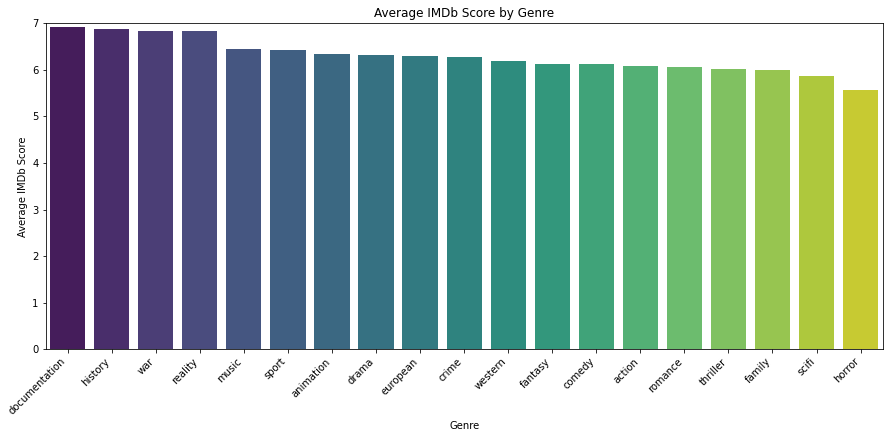

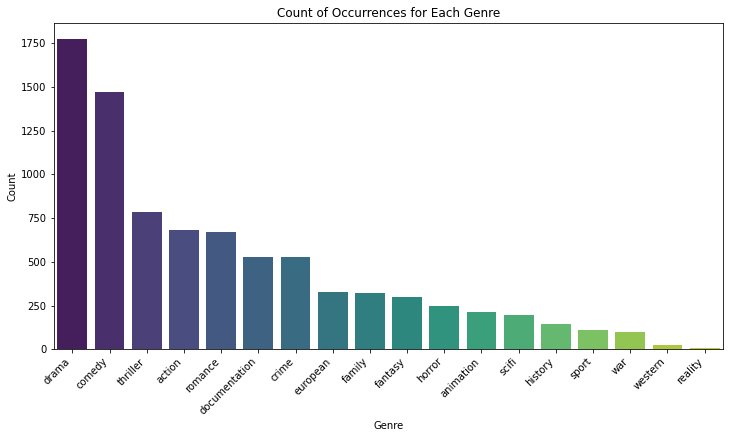

In [246]:
movies_genres_df.reset_index(drop=True, inplace=True)

# Calculate the average IMDb score for each genre
average_scores_by_genre = {}
for genre in genres_set:
    genre_columns = [col for col in movies_genres_df.columns if genre in col]
    average_scores_by_genre[genre] = movies_genres_df[movies_genres_df[genre_columns].any(axis=1)]['imdb_score'].mean()

# Convert the result into a DataFrame
average_scores_df = pd.DataFrame(list(average_scores_by_genre.items()), columns=['Genre', 'Average IMDb Score'])

# Sort genres by average score in descending order
average_scores_df = average_scores_df.sort_values(by='Average IMDb Score', ascending=False)


# Plotting Average Scores
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
sns.barplot(x=average_scores_df['Genre'], y=average_scores_df['Average IMDb Score'], palette='viridis')
plt.title('Average IMDb Score by Genre')
plt.xlabel('Genre')
plt.ylabel('Average IMDb Score')
plt.ylim(0,7)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

genre_counts = movies_genres_df.iloc[:, 18:].sum()
genre_counts = genre_counts.sort_values(ascending=False)

# Plotting the count of occurrences for each genre
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Count of Occurrences for Each Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()